In [4]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [5]:
cust= pd.read_csv(r"C:\Users\isuser.SRKRIT\Desktop\Invistico_Airline.csv", header=0)
cust.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [6]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [7]:
cust.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [8]:
# Use KNNImputer to address missing values

from sklearn.impute import KNNImputer

imputer_int = KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform', metric='nan_euclidean',
                         copy=True, add_indicator=False)

cust['Arrival Delay in Minutes'] = imputer_int.fit_transform(cust[['Arrival Delay in Minutes']])

In [6]:
cust.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [9]:
# Use LabelBinarizer to handle categorical data

from sklearn.preprocessing import LabelBinarizer

LB = LabelBinarizer()

cust['satisfaction'] = LB.fit_transform(cust['satisfaction'])
cust['Gender'] = LB.fit_transform(cust['Gender'])

In [10]:
cust.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,1,1,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,1,0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,1,0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,1,0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [11]:
cust=cust.rename(columns={'Class':'customer_class'},inplace=False)

In [12]:
cust.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,customer_class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,1,1,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,1,0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,1,0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,1,0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [13]:
# Use LabelBinarizer to handle categorical data

from sklearn.preprocessing import LabelBinarizer

LB = LabelBinarizer()

cust['Type of Travel'] = LB.fit_transform(cust['Type of Travel'])

In [14]:
cust.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,customer_class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,Loyal Customer,65,1,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,1,1,Loyal Customer,47,1,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,1,0,Loyal Customer,15,1,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,1,0,Loyal Customer,60,1,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,1,0,Loyal Customer,70,1,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [15]:
cust.head(64944)

,satisfaction,Gender,Customer Type,Age,Type of Travel,customer_class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,Loyal Customer,65,1,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,1,1,Loyal Customer,47,1,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,1,0,Loyal Customer,15,1,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,1,0,Loyal Customer,60,1,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,1,0,Loyal Customer,70,1,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64939,1,0,Loyal Customer,44,0,Business,85,0,3,0,2,4,1,3,4,4,4,4,5,4,3,0,0.0
64940,1,0,Loyal Customer,16,0,Eco Plus,3857,0,3,0,2,2,0,2,2,3,2,4,3,4,2,0,0.0
64941,1,0,Loyal Customer,44,0,Business,3966,0,3,0,2,4,2,5,3,3,3,3,3,3,2,0,0.0
64942,1,1,Loyal Customer,14,0,Eco,1520,0,3,0,2,5,0,5,5,4,3,2,5,2,5,18,16.0


In [16]:
cust['customer_class']=cust['customer_class'].str.replace('Eco Plus','0')
cust['customer_class']=cust['customer_class'].str.replace('Business','1')
cust['customer_class']=cust['customer_class'].str.replace('Eco','2')

In [17]:
cust.head(64944)

,satisfaction,Gender,Customer Type,Age,Type of Travel,customer_class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,Loyal Customer,65,1,2,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,1,1,Loyal Customer,47,1,1,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,1,0,Loyal Customer,15,1,2,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,1,0,Loyal Customer,60,1,2,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,1,0,Loyal Customer,70,1,2,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64939,1,0,Loyal Customer,44,0,1,85,0,3,0,2,4,1,3,4,4,4,4,5,4,3,0,0.0
64940,1,0,Loyal Customer,16,0,0,3857,0,3,0,2,2,0,2,2,3,2,4,3,4,2,0,0.0
64941,1,0,Loyal Customer,44,0,1,3966,0,3,0,2,4,2,5,3,3,3,3,3,3,2,0,0.0
64942,1,1,Loyal Customer,14,0,2,1520,0,3,0,2,5,0,5,5,4,3,2,5,2,5,18,16.0


In [18]:
# Use LabelBinarizer to handle categorical data

from sklearn.preprocessing import LabelBinarizer

LB = LabelBinarizer()

cust['Customer Type'] = LB.fit_transform(cust['Customer Type'])

In [19]:
cust.head(64944)

,satisfaction,Gender,Customer Type,Age,Type of Travel,customer_class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,0,65,1,2,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,1,1,0,47,1,1,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,1,0,0,15,1,2,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,1,0,0,60,1,2,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,1,0,0,70,1,2,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64939,1,0,0,44,0,1,85,0,3,0,2,4,1,3,4,4,4,4,5,4,3,0,0.0
64940,1,0,0,16,0,0,3857,0,3,0,2,2,0,2,2,3,2,4,3,4,2,0,0.0
64941,1,0,0,44,0,1,3966,0,3,0,2,4,2,5,3,3,3,3,3,3,2,0,0.0
64942,1,1,0,14,0,2,1520,0,3,0,2,5,0,5,5,4,3,2,5,2,5,18,16.0


In [20]:
# Identify the Independent and Target variables

IndepVar = []
for col in cust.columns:
    if col != 'satisfaction':
        IndepVar.append(col)

TargetVar = 'satisfaction'

x = cust[IndepVar]
y = cust[TargetVar]

In [24]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [22]:
cols=['Age','Flight Distance','Seat comfort','Departure/Arrival time convenient','Food and drink','Gate location','Inflight wifi service','Inflight entertainment','Online support','Ease of Online booking','On-board service','Leg room service','Baggage handling','Checkin service','Cleanliness','Online boarding','Departure Delay in Minutes','Arrival Delay in Minutes']

In [23]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols] = mmscaler.fit_transform(x_train[cols])
x_train = pd.DataFrame(x_train)

x_test[cols] = mmscaler.fit_transform(x_test[cols])
x_test = pd.DataFrame(x_test)

In [26]:
EMResults= pd.read_csv(r"C:\Users\isuser.SRKRIT\Downloads\HTResults (1).csv", header=0)

Model Name:  LogisticRegression()
Confusion matrix : 
 [[17124  4286]
 [ 5604 11950]]
Outcome values : 
 17124 4286 5604 11950
Classification report : 
               precision    recall  f1-score   support

           1       0.75      0.80      0.78     21410
           0       0.74      0.68      0.71     17554

    accuracy                           0.75     38964
   macro avg       0.74      0.74      0.74     38964
weighted avg       0.75      0.75      0.75     38964

Accuracy : 74.6 %
Precision : 75.3 %
Recall : 80.0 %
F1 Score : 0.776
Specificity or True Negative Rate : 68.1 %
Balanced Accuracy : 74.0 %
MCC : 0.485
roc_auc_score: 0.74


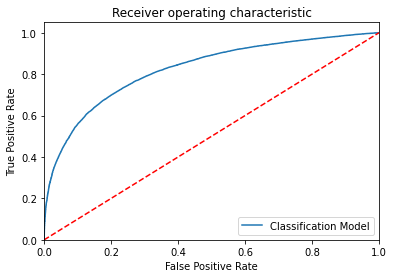

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[20240  1170]
 [ 1317 16237]]
Outcome values : 
 20240 1170 1317 16237
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.95      0.94     21410
           0       0.93      0.92      0.93     17554

    accuracy                           0.94     38964
   macro avg       0.94      0.94      0.94     38964
weighted avg       0.94      0.94      0.94     38964

Accuracy : 93.6 %
Precision : 93.9 %
Recall : 94.5 %
F1 Score : 0.942
Specificity or True Negative Rate : 92.5 %
Balanced Accuracy : 93.5 %
MCC : 0.871
roc_auc_score: 0.935


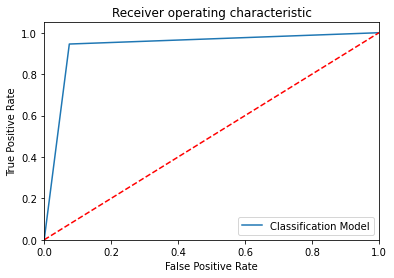

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[20380  1030]
 [  658 16896]]
Outcome values : 
 20380 1030 658 16896
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.95      0.96     21410
           0       0.94      0.96      0.95     17554

    accuracy                           0.96     38964
   macro avg       0.96      0.96      0.96     38964
weighted avg       0.96      0.96      0.96     38964

Accuracy : 95.7 %
Precision : 96.9 %
Recall : 95.2 %
F1 Score : 0.96
Specificity or True Negative Rate : 96.3 %
Balanced Accuracy : 95.8 %
MCC : 0.913
roc_auc_score: 0.957


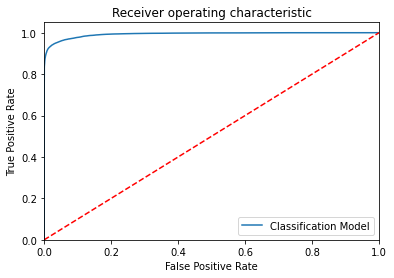

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[20408  1002]
 [  678 16876]]
Outcome values : 
 20408 1002 678 16876
Classification report : 
               precision    recall  f1-score   support

           1       0.97      0.95      0.96     21410
           0       0.94      0.96      0.95     17554

    accuracy                           0.96     38964
   macro avg       0.96      0.96      0.96     38964
weighted avg       0.96      0.96      0.96     38964

Accuracy : 95.7 %
Precision : 96.8 %
Recall : 95.3 %
F1 Score : 0.96
Specificity or True Negative Rate : 96.1 %
Balanced Accuracy : 95.7 %
MCC : 0.913
roc_auc_score: 0.957


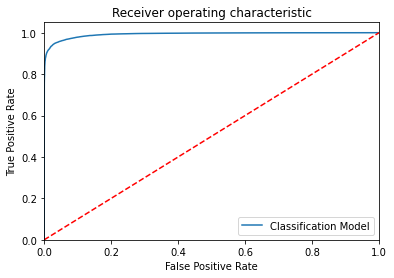

-----------------------------------------------------------------------------------------------------


In [ ]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)

modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
                             n_jobs=None, random_state=None, verbose=0)

ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     min_impurity_split=None, init=None, random_state=None,
                                     max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, modelBAG, ModelGB, ModelLGB, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------